In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:

# 图像路径
image_path = r'C:\Users\15359\Desktop\photo.jpg'

# 读取图像
image = cv2.imread(image_path)

# 将图像从BGR转换为RGB（cv2读取的图像是BGR格式）
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 获取图像的尺寸（高度h，宽度w，通道数c）
h, w, c = image.shape

# 将图像从3d(h,w,c)压为2d（h*w，c），每行代表一个像素的RGB值
pixels = image.reshape(-1, 3)

In [3]:


# 手动实现KMeans算法的类
class KMeansManual:
    #初始化函数
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters  # 聚类数量
        self.max_iter = max_iter  # 最大迭代次数
        self.tol = tol  # 收敛判定的容差
        if random_state:
            np.random.seed(random_state)  # 设置随机种子以便重现结果
    #定义训练步骤    
    def fit(self, X):
        # 随机初始化聚类中心
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]#在所有数据行中，不重复地选取设定个数的向量作为初始化聚类中心
        for i in range(self.max_iter):
            # 计算每个点到聚类中心的距离
            distances = np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2)#将x扩展为三维（h*w，1,c），1为广播机制相减变为n_clusters，对特征轴求l2范数（默认）
            # 分配每个点到最近的聚类中心
            labels = np.argmin(distances, axis=1)#distances是（h*w，n_clusters）的二维数组，每个数据在n_clusters上找最小值返回索引作为标签即归类
            # 计算新的聚类中心
            new_centers = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])#遍历每个簇，标签相同的数据沿着第0个维度求均值
            # 判断聚类中心是否收敛（新旧中心的变化小于容差）
            if np.linalg.norm(self.centers - new_centers) < self.tol:#做差求所有元素的l2范数返回标量与容差比较
                break
            self.centers = new_centers  # 更新聚类中心
        self.labels = labels  # 保存每个点的标签（属于哪个聚类）
        return self



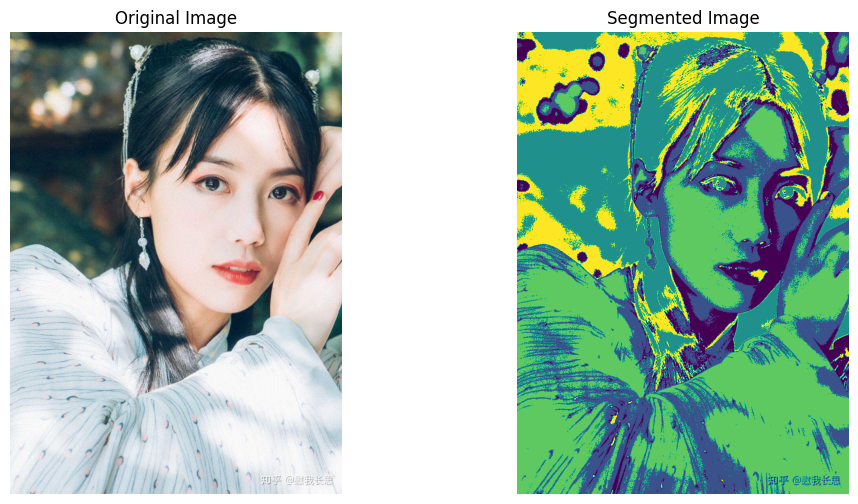

In [4]:
# 使用KMeansManual算法进行聚类
kmeans = KMeansManual(n_clusters=5, random_state=0).fit(pixels)
labels = kmeans.labels#得到标签一维数组，大小h*w

# 将聚类结果映射回图像
segmented_image = labels.reshape(h, w)#扩展为2d

# 显示原图像和分割后的图像
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmented_image, cmap='viridis')#使用 'viridis' 颜色映射表来显示分割后的图像
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()